In [1]:
import matplotlib.pyplot as plt

import numpy as np

In [2]:
benchmark = [
    {
        'Model': 'Swift YOLO Nano',
        'Type': 'Float32',
        'Inputs': '192x192x3',
        'Accuracy': 0.5,
        'MACs (G)': 0.287,
        'Params (M)': 2.495,
        'Latency (ms)': 100,
    },
    {
        'Model': 'Swift YOLO Nano',
        'Type': 'Float32',
        'Inputs': '224x224x3',
        'Accuracy': 0.6,
        'MACs (G)': 0.39,
        'Params (M)': 2.495,
        'Latency (ms)': 200,
    }, 
    {
        'Model': 'Swift YOLO Nano',
        'Type': 'Float32',
        'Inputs': '320x320x3',
        'Accuracy': 0.7,
        'MACs (G)': 0.796,
        'Params (M)': 2.495,
        'Latency (ms)': 300,
    },
    {
        'Model': 'Swift YOLO Nano',
        'Type': 'Int8 (PTQ)',
        'Inputs': '192x192x3',
        'Accuracy': 0.4,
        'MACs (G)': 0.2,
        'Params (M)': 2.0,
        'Latency (ms)': 30,
    },
    {
        'Model': 'Swift YOLO Nano',
        'Type': 'Int8 (PTQ)',
        'Inputs': '224x224x3',
        'Accuracy': 0.5,
        'MACs (G)': 0.3,
        'Params (M)': 2.0,
        'Latency (ms)': 40,
    }, 
    {
        'Model': 'Swift YOLO Nano',
        'Type': 'Int8 (PTQ)',
        'Inputs': '320x320x3',
        'Accuracy': 0.6,
        'MACs (G)': 0.7,
        'Params (M)': 2.0,
        'Latency (ms)': 50,
    }, 

    {
        'Model': 'Swift YOLO Tiny',
        'Type': 'Float32',
        'Inputs': '192x192x3',
        'Accuracy': 0.4,
        'MACs (G)': 0.125,
        'Params (M)': 1.011,
        'Latency (ms)': 80,
    },
    {
        'Model': 'Swift YOLO Tiny',
        'Type': 'Float32',
        'Inputs': '224x224x3',
        'Accuracy': 0.5,
        'MACs (G)': 0.184,
        'Params (M)': 1.011,
        'Latency (ms)': 160,
    }, 
    {
        'Model': 'Swift YOLO Tiny',
        'Type': 'Float32',
        'Inputs': '320x320x3',
        'Accuracy': 0.6,
        'MACs (G)': 0.375,
        'Params (M)': 1.011,
        'Latency (ms)': 240,
    },
    {
        'Model': 'Swift YOLO Tiny',
        'Type': 'Int8 (PTQ)',
        'Inputs': '192x192x3',
        'Accuracy': 0.3,
        'MACs (G)': 0.1,
        'Params (M)': 1.0,
        'Latency (ms)': 15,
    },
    {
        'Model': 'Swift YOLO Tiny',
        'Type': 'Int8 (PTQ)',
        'Inputs': '224x224x3',
        'Accuracy': 0.4,
        'MACs (G)': 0.18,
        'Params (M)': 1.0,
        'Latency (ms)': 30,
    }, 
    {
        'Model': 'Swift YOLO Tiny',
        'Type': 'Int8 (PTQ)',
        'Inputs': '320x320x3',
        'Accuracy': 0.5,
        'MACs (G)': 0.37,
        'Params (M)': 1.0,
        'Latency (ms)': 45,
    }, 
]

for i in range(len(benchmark)):
    benchmark[i]['Name'] = benchmark[i]['Model'] + ' - ' + benchmark[i]['Type'] + ' - ' + benchmark[i]['Inputs'][:3]

In [5]:
import numpy as np

/home/nullptr/miniconda3/envs/ma/lib/python3.10/site-packages/matplotlib/lines.py:1265: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sz = float(sz)
/home/nullptr/miniconda3/envs/ma/lib/python3.10/site-packages/matplotlib/lines.py:1265: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sz = float(sz)
/home/nullptr/miniconda3/envs/ma/lib/python3.10/site-packages/matplotlib/lines.py:1265: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sz = float(sz)
/home/nullptr/miniconda3/envs/ma/lib/python3.10/site-packages/matplotlib/lines.py:1265: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sz = float(sz)
/home/nu

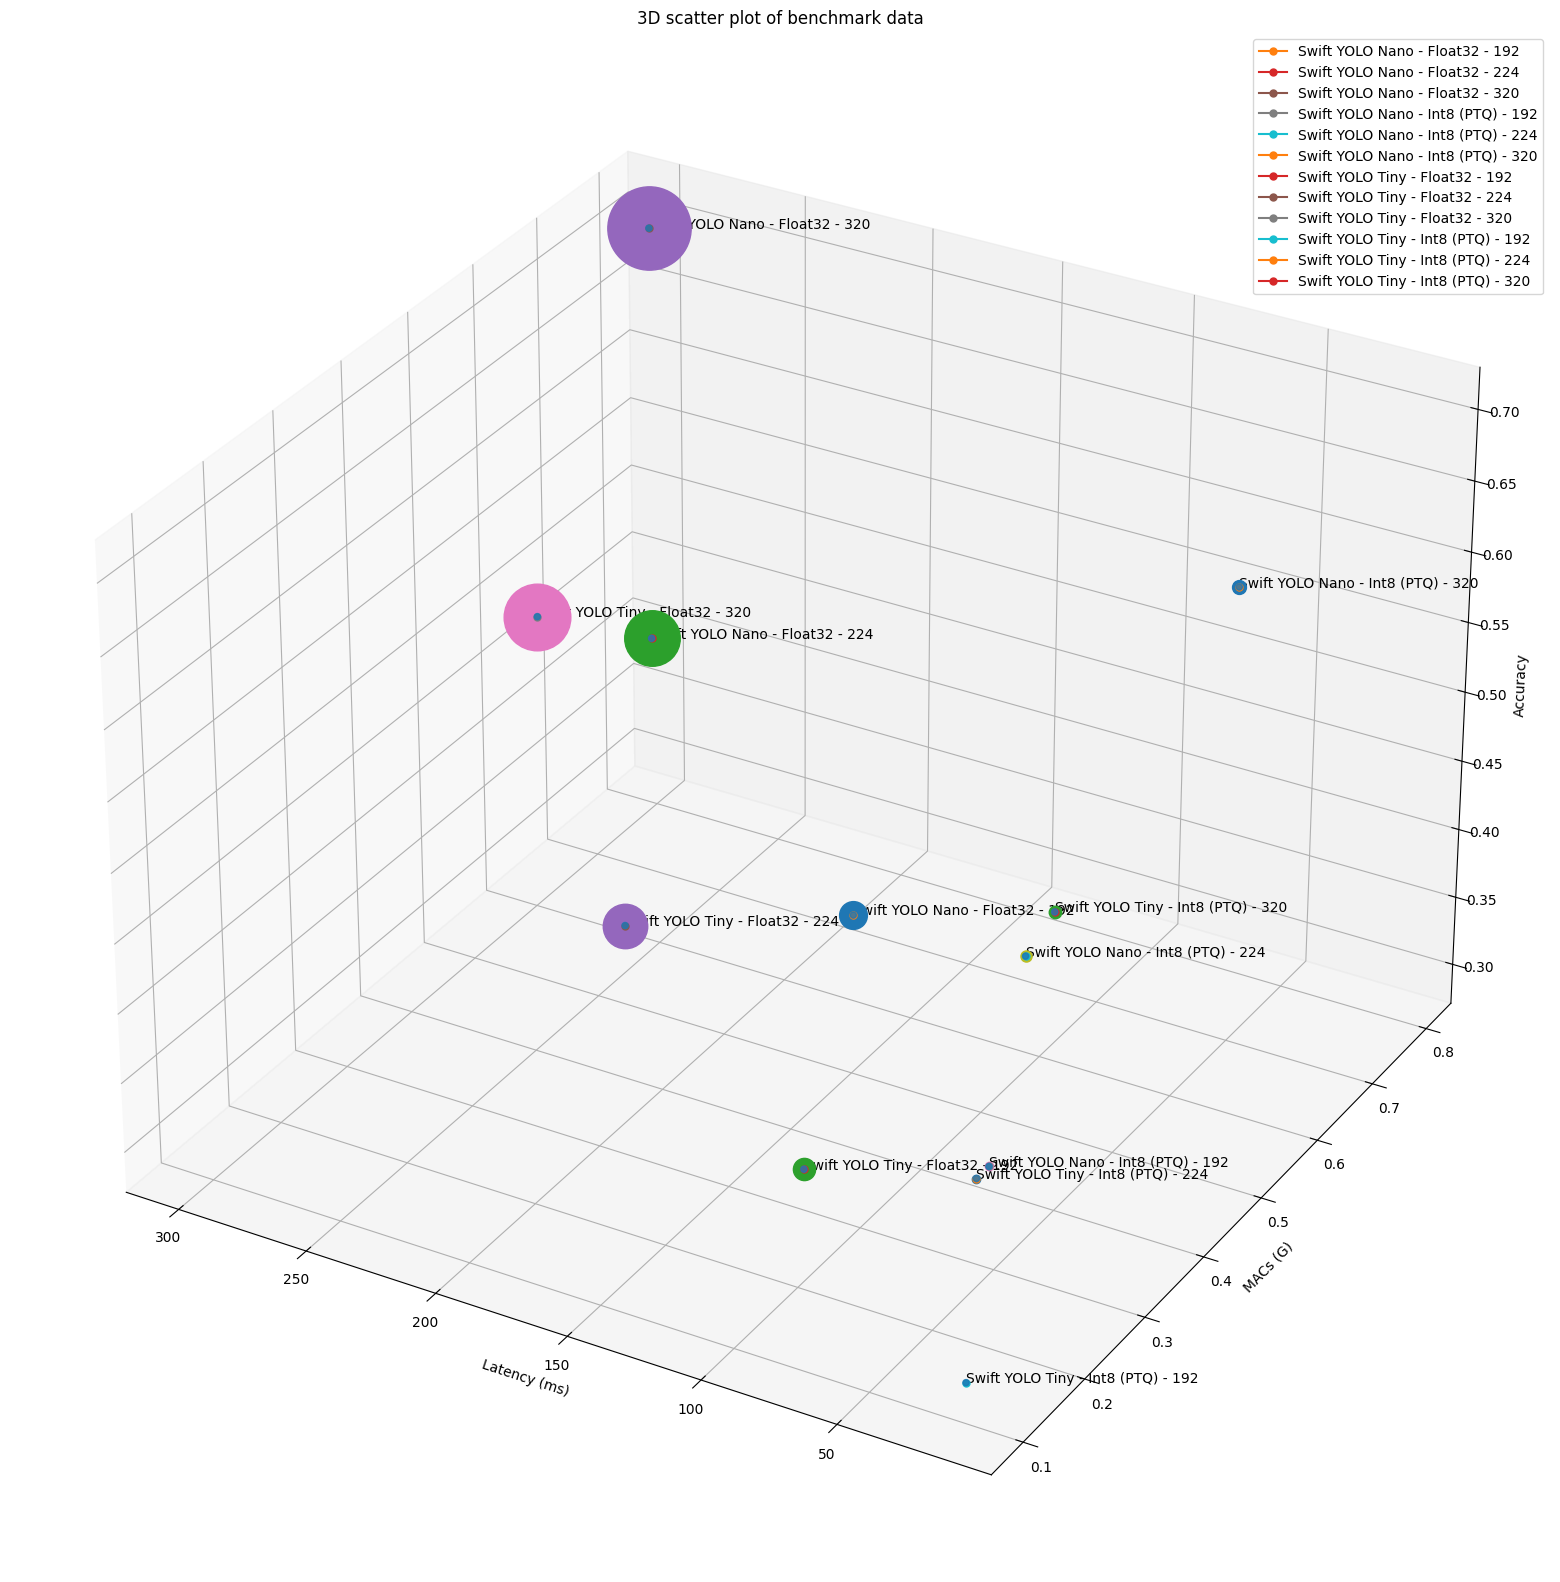

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd



df = pd.DataFrame(benchmark)

# Assuming df is your DataFrame and it includes columns 'MACs', 'Params', 'Latency', 'Model', 'Type', 'Inputs'

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

# Creating plot
sctt = ax.scatter(df['Latency (ms)'], df['MACs (G)'], df['Accuracy'], alpha=0.8)
ax.set_xlabel('Latency (ms)')
ax.set_ylabel('MACs (G)')
ax.set_zlabel('Accuracy')

# change x axis direction
ax.invert_xaxis()

# for name, group in df.groupby('Model'):
#     for name1, group1 in group.groupby('Type'):
#         if name == name1:
#             # draw line from each point to the next point
#             pt = group[['Latency', 'MACs', 'Accuracy']].values
#             pt1 = group1[['Latency', 'MACs', 'Accuracy']].values
#             for i in range(len(pt)):
#                 ax.plot([pt[i][0], pt1[i][0]], [pt[i][1], pt1[i][1]], [pt[i][2], pt1[i][2]], marker='o', linestyle='-', ms=5)


# Adding labels and connecting points with the same model name
for name, group in df.groupby('Name'):
    sz = np.exp(-1 * group['Latency (ms)']) * group['MACs (G)'] * group['Accuracy']
    sz = np.log(sz) * -1  / 5.0

    ms = sz.astype(int)

    x = group['Latency (ms)']
    y = group['MACs (G)']
    z = group['Accuracy']

    # get color from color map


    ax.plot(x, y, z, marker='o', linestyle='-', ms=ms, label=None)
    ax.plot(x, y, z, marker='o', linestyle='-', ms=5, label=name)
    

    for i in range(len(group)):
        ax.text(group['Latency (ms)'].iloc[i], group['MACs (G)'].iloc[i], group['Accuracy'].iloc[i], name, size=10, zorder=1, color='k')

plt.title("3D scatter plot of benchmark data")
plt.legend()
plt.show()